## 참고 사이트
- https://velog.io/@ezoo0422/Python-pycaret%EC%9D%84-%EC%82%AC%EC%9A%A9%ED%95%98%EC%97%AC-%EB%AA%A8%EB%8D%B8-%EC%84%A0%EC%A0%95%ED%95%98%EA%B8%B0
- https://ideal-dominate.medium.com/pycaret-regression-%EA%B0%99%EC%9D%B4-%ED%95%B4%EB%B4%90%EC%9A%94-eaf0e36268
- https://ideal-dominate.medium.com/%ED%8C%8C%EB%9E%80%EB%A7%8C%EC%9E%A5-pycaret-%EC%84%A4%EC%B9%98%EA%B8%B0-cf703f692e3a
- https://koreapy.tistory.com/744

- https://pycaret.gitbook.io/docs/get-started/quickstart

## pycaret 설치
- conda install -c conda-forge pycaret

In [ ]:
pip install pycaret[full]

## data load

In [4]:
from pycaret.datasets import get_data
dataset = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


random state를 789으로 해줘서 90% :10%으로 훈련 데이터, 테스트 데이터를 나눈다

In [5]:
data = dataset.sample(frac=0.9, random_state=786) 
data_unseen = dataset.drop(data.index) 
data.reset_index(drop=True, inplace=True) 
data_unseen.reset_index(drop=True, inplace=True) 
print('Data for Modeling: ' + str(data.shape)) 
print('Unseen Data For Predictions: ' + str(data_unseen.shape)) 
# Data for Modeling: (5400, 8) # Unseen Data For Predictions: (600, 8)

Data for Modeling: (1204, 7)
Unseen Data For Predictions: (134, 7)


## 모델 환경 설정 (Settinf up Environment in PyCaret)

- pycaret을 사용하기 전에 pycaret에 맞게 데이터를 설정
- set_up() 함수를 사용
- 기본적으로 data와 target을 입력

In [6]:
# 자동으로 데이터 유형 지정 
from pycaret.regression import *
s = setup(data, target = 'charges')

,Description,Value
0,session_id,4031
1,Target,charges
2,Original Data,"(1204, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(842, 14)"


#### set_up(): pycaret을 사용하기 위한 data setting

- session_id: random_state와 같은 개념으로 같은 결과가 나올 수 있게 seed를 고정
- data: train 데이터 입력
- target = target 변수 이름을 입력

## 모델 생성 - 비교

- 여러 모델을 적합하여 성능을 비교하는 단계
- compare_models(): 다양한 모델 적합 후 성능 비교
    - fold: cross_validation의 fold를 지정 (default = 10)
    - sort: 정렬기준 지표 설정
    - n_select: 상위 n개의 모델 결과만 출력

In [17]:
best_model_5 = compare_models(sort='RMSE', n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2687.9230,22743166.9700,4725.4512,0.8365,0.4402,0.3123,0.0360
rf,Random Forest Regressor,2810.1330,24905674.1922,4967.8902,0.8195,0.4641,0.3332,0.1230
catboost,CatBoost Regressor,2902.3033,25079290.9831,4969.7127,0.8203,0.4877,0.3544,0.7210
lightgbm,Light Gradient Boosting Machine,3017.5191,25394528.7410,5001.6867,0.8174,0.5562,0.3835,0.0430
et,Extra Trees Regressor,2831.9713,28488572.9237,5306.9650,0.7937,0.4770,0.3185,0.1380
ada,AdaBoost Regressor,4201.5323,28625162.0662,5323.0796,0.7949,0.6393,0.7340,0.0140
xgboost,Extreme Gradient Boosting,3212.2912,30319669.4000,5494.0190,0.7793,0.5862,0.4180,0.1550
llar,Lasso Least Angle Regression,4331.8511,38102857.6243,6126.2340,0.7296,0.6169,0.4527,0.0080
ridge,Ridge Regression,4349.3851,38133945.4000,6128.4132,0.7295,0.6054,0.4556,0.0090
br,Bayesian Ridge,4347.1880,38136703.5184,6128.6632,0.7295,0.6053,0.4551,0.0070


In [18]:
print(best_model_5)

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=4031, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_w

In [20]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## 모델 직접 생성

- 하나의 모델의 적합 결과를 보는 방법
- create_model(): 하나의 모델 적합

    - fold: cross_validation의 fold 지정 (default = 10)

In [16]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2620.3157,24311811.8955,4930.7010,0.7638,0.4266,0.2967
1,3461.8924,35851709.5386,5987.6297,0.7277,0.5656,0.3951
2,2566.8796,24947015.8101,4994.6988,0.8172,0.4229,0.2648
3,2194.5211,17094683.5681,4134.5718,0.8741,0.3736,0.2771
4,2841.0739,18984822.7295,4357.1576,0.8268,0.4346,0.4051
5,2891.6093,23031160.0674,4799.0791,0.8186,0.4187,0.3331
6,2985.5779,27090667.4053,5204.8696,0.8631,0.4918,0.3518
7,3017.9726,25728367.9623,5072.3139,0.8153,0.5448,0.4081
8,2662.6769,25037569.9827,5003.7556,0.8477,0.4766,0.3045


## 모델 튜닝 - tuning
- tune_model() 함수 사용
- tune_model(  estimator = None, 
               fold = 10, 
               round = 4, 
               n_iter = 10,
               custom_grid = None, # 커스텀 파라미터 dict
               optimize = 'Accuracy', # 튜닝을 통해 최적화하고자 하는 대상 기본값은 정확도
               custom_scorer = None, # sklearn.make_scorer 로 제작된 메소드만 가능
               choose_better = False,
               verbose = True)

In [21]:
tuned_top5 = [tune_model(i, optimize = 'RMSE', n_iter=10) for i in best_model_5]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1837.1224,20973483.7690,4579.6816,0.7963,0.3411,0.1387
1,3014.4218,39288052.1321,6268.0182,0.7016,0.4829,0.1798
2,2445.6080,26051588.3547,5104.0757,0.8091,0.3825,0.1480
3,1750.1532,16420963.4985,4052.2788,0.8790,0.2816,0.1184
4,1412.2679,10145217.7846,3185.1558,0.9074,0.2077,0.1086
5,2298.5219,22760948.0926,4770.8435,0.8208,0.3197,0.1384
6,2751.0710,32774254.8004,5724.8803,0.8344,0.4524,0.1873
7,2706.9149,28306522.7364,5320.3875,0.7968,0.4808,0.1805
8,2237.5031,22547005.9821,4748.3688,0.8628,0.3893,0.1430


## 모델 튜닝 - blending
- 생성한 모델끼리의 혼합

In [22]:
blender_top5 = blend_models(estimator_list=tuned_top5, optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2093.1481,20074188.9061,4480.4228,0.8050,0.3697,0.2267
1,2894.4662,34291733.9069,5855.9144,0.7396,0.5012,0.2574
2,2502.8511,24252095.4031,4924.6417,0.8223,0.4017,0.2097
3,1942.6633,13552926.1069,3681.4299,0.9002,0.3122,0.2143
4,1789.4250,9322121.4889,3053.2149,0.9150,0.3013,0.2401
5,2432.9456,19950590.5413,4466.6084,0.8429,0.3435,0.2180
6,2776.0151,27018970.0968,5197.9775,0.8635,0.4554,0.2729
7,2535.6136,22895756.8466,4784.9511,0.8356,0.4658,0.2469
8,2329.2640,21124181.8338,4596.1051,0.8715,0.4088,0.2230


## Analyze model
This function analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.
- https://pycaret.gitbook.io/docs/get-started/functions/analyze

- Residuals Plot : 'residuals'
- Prediction Error Plot : 'error'
- Cooks Distance Plot : 'cooks'
- Recursive Feature Selection : 'rfe'
- Learning Curve : 'learning'
- Validation Curve : 'vc'
- Manifold Learning : 'manifold'
- Feature Importance : 'feature'
- Model Hyperparameter : 'parameter'

In [9]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

evaluate_model can only be used in Notebook since it uses ipywidget . You can also use the plot_model function to generate plots individually.

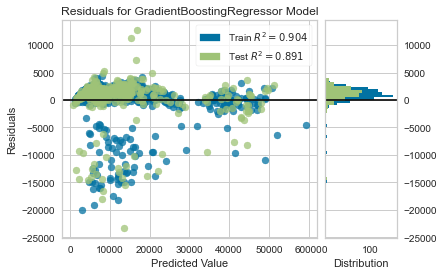

In [10]:
plot_model(best_model, plot = 'residuals')

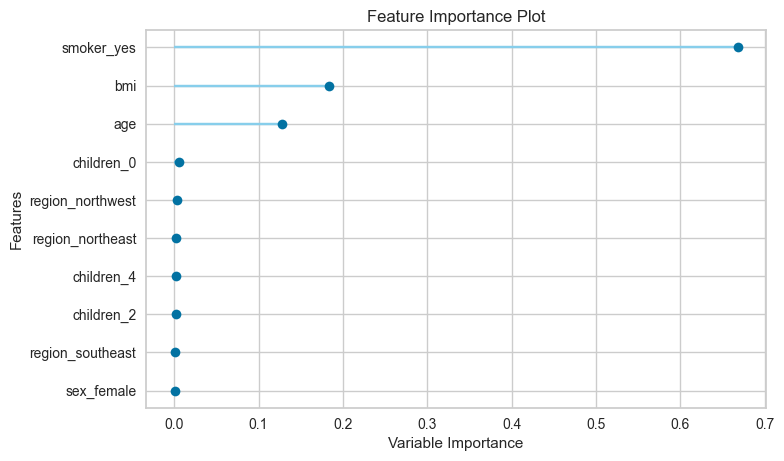

In [11]:
plot_model(best_model, plot = 'feature')

In [23]:
evaluate_model(blender_top5)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

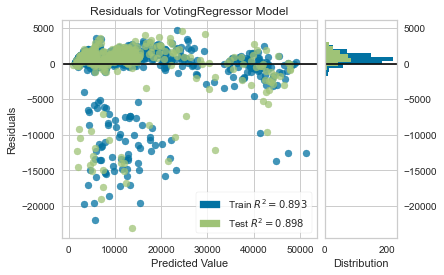

In [24]:
plot_model(blender_top5, plot = 'residuals')

In [25]:
plot_model(blender_top5, plot = 'feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

## interpret_model
This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

### interpret_model() parameters
- save = True : 그래프 이미지로 저장
- plot = 'correlation', 'summary' , 'reason' : plot types
- plot = 'pfi' : Permutation Feature Importance
- feature = 'col' : 특정 컬럼 지정 가능

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7037,0.7865,0.7368,0.5600,0.6364,0.3941,0.4047
1,0.6667,0.7233,0.5789,0.5238,0.5500,0.2863,0.2872
2,0.7963,0.8015,0.6842,0.7222,0.7027,0.5479,0.5484
3,0.6852,0.7985,0.4211,0.5714,0.4848,0.2656,0.2720
4,0.7963,0.8000,0.6842,0.7222,0.7027,0.5479,0.5484
5,0.7407,0.7910,0.7895,0.6000,0.6818,0.4698,0.4825
6,0.7407,0.7669,0.4211,0.7273,0.5333,0.3710,0.3976
7,0.7358,0.8096,0.4737,0.6923,0.5625,0.3827,0.3968
8,0.7547,0.8375,0.6316,0.6667,0.6486,0.4605,0.4609


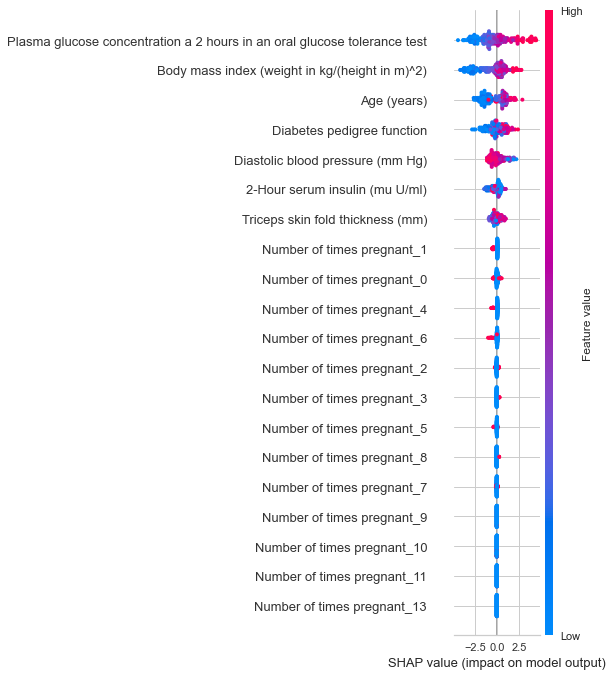

In [30]:
# load dataset
from pycaret.datasets import get_data
diabetes = get_data('diabetes')

# init setup
from pycaret.classification import *
clf1 = setup(data = diabetes, target = 'Class variable')

# creating a model
xgboost = create_model('xgboost')

# interpret model
interpret_model(xgboost)

In [33]:
pip install interpret-community

  Using cached interpret_community-0.26.0-py3-none-any.whl (130 kB)
  Using cached ml_wrappers-0.2.0-py3-none-any.whl (29 kB)
Note: you may need to restart the kernel to use updated packages.


In [34]:
# load dataset
from pycaret.datasets import get_data
diabetes = get_data('diabetes')

# init setup
from pycaret.classification import *
clf1 = setup(data = diabetes, target = 'Class variable')

# creating a model
xgboost = create_model('xgboost')

# interpret model
interpret_model(xgboost, plot = 'pfi')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8148,0.8677,0.6316,0.8000,0.7059,0.5735,0.5820
1,0.6667,0.7684,0.4737,0.5294,0.5000,0.2512,0.2520
2,0.7222,0.7820,0.3684,0.7000,0.4828,0.3170,0.3476
3,0.7037,0.7701,0.4444,0.5714,0.5000,0.2941,0.2988
4,0.7778,0.8858,0.8333,0.6250,0.7143,0.5385,0.5534
5,0.7037,0.8133,0.5556,0.5556,0.5556,0.3333,0.3333
6,0.7593,0.8349,0.6111,0.6471,0.6286,0.4507,0.4511
7,0.7736,0.8032,0.6667,0.6667,0.6667,0.4952,0.4952
8,0.7736,0.8286,0.6667,0.6667,0.6667,0.4952,0.4952


ImportError: interpret-community library not found. pip install interpret-community to generate pfi plot in interpret_model function.

## Predictions
This function predicts Label using the trained model. When data is None, it predicts label and score on the test set (created during the setup function).

- 지금까지는 setup에 넣었던 데이터가 KFold 방식으로 train/valid 로 나누어 학습
- finalize_model()함수를 통해 전체 데이터로 마지막 학습을 진행

In [26]:
predict_model(blender_top5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2061.6799,15706540.4761,3963.1478,0.8978,0.3735,0.2119


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,51.0,25.799999,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9861.025391,11749.575285
1,18.0,33.880001,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11482.634766,2296.111523
2,18.0,38.279999,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14133.038086,1795.511493
3,25.0,30.590000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2727.395020,5651.563587
4,39.0,42.654999,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5757.413574,7333.497897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,43.0,30.684999,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8310.838867,8735.747156
358,19.0,25.745001,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2710.828613,3739.609643
359,20.0,31.790001,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3056.388184,6356.520422
360,60.0,31.350000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,46130.527344,44133.530485


The evaluation metrics are calculated on the test set. The second output is the pd.DataFrame with predictions on the test set (see the last two columns). To generate labels on the unseen (new) dataset, simply pass the dataset in the predict_model function.

In [27]:
final_model = finalize_model(blender_top5)
prediction = predict_model(final_model, data=data_unseen)
prediction.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2447.6545,26984901.2518,5194.6993,0.8233,0.3890,0.2061


,age,sex,bmi,children,smoker,region,charges,Label
0,31,female,25.740,0,no,southeast,3756.62160,3878.376017
1,37,female,27.740,3,no,northwest,7281.50560,7315.026503
2,56,female,39.820,0,no,southeast,11090.71780,12247.725980
3,23,male,23.845,0,no,northeast,2395.17155,3153.428066
4,19,female,28.600,5,no,southwest,4687.79700,4610.867552


## 평가

In [29]:
from pycaret.utils import check_metric

check_metric(prediction['charges'], prediction['Label'], metric = 'RMSE')

5194.6993

## Save the model


In [14]:
save_model(best_model, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                           

### To load the model back in the environment:

In [15]:
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_dec